# Import Libraries

In [1]:
# Downloading, moving and unzipping files
import webbrowser
from time import sleep
import shutil
import os
#from zipfile import ZipFile
import glob

# DataFrame exploration and manipulation
import pandas as pd
import numpy as np
import datetime as dt

# Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Upload Data

In [2]:
# Climate data
weather_df = pd.read_csv('../../BikeSharing/MiBici/Weather/NOAA_NCEI_Climate_clean.csv', encoding='latin-1')

# COVID-19 data
covid_df = pd.read_csv('../../BikeSharing/MiBici/COVID/COVID_daily_cases_clean.csv', encoding='latin-1')

In [5]:
# obtain the csv data file names
path = "../../BikeSharing/MiBici/BikeTrips/CleanData/CleanerData/"
files = [file for file in os.listdir(path) if file.endswith(".csv")]

# Data Viz

For every visualization with bike data, you'll need to loop through files and run each df through a function that'll arrange your data in the way that you need for your analysis

## Bike Trip Counts

In [3]:
# Loop through each file, save as dataframe, and obtain the row count
output = pd.Series(name="Rows", dtype=int)
for file in files:
    df = pd.read_csv(os.path.join(path, file), encoding='latin-1')
    output.at[file.replace(".csv", "")] = df.shape[0]
output.at["Total"] = output.sum()

In [4]:
print('# Observations')
print('2015-2022:', output.at["Total"])
print('2017-2022:', output[25:85].sum())
print('2018-2022:', output[37:85].sum())
print('2019-2022:', output[49:85].sum())

# Observations
2015-2022: 20079420
2017-2022: 16607153
2018-2022: 14090619
2019-2022: 10687134


<AxesSubplot:>

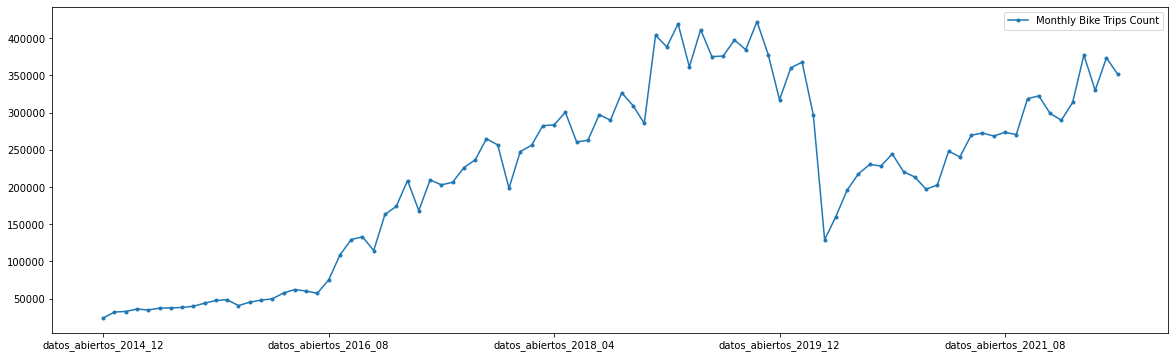

In [5]:
fig, ax = plt.subplots(figsize=(20, 6))
output[:-1].plot(label="Monthly Bike Trips Count", legend=True, marker='.')   # BLUE LINE

<AxesSubplot:>

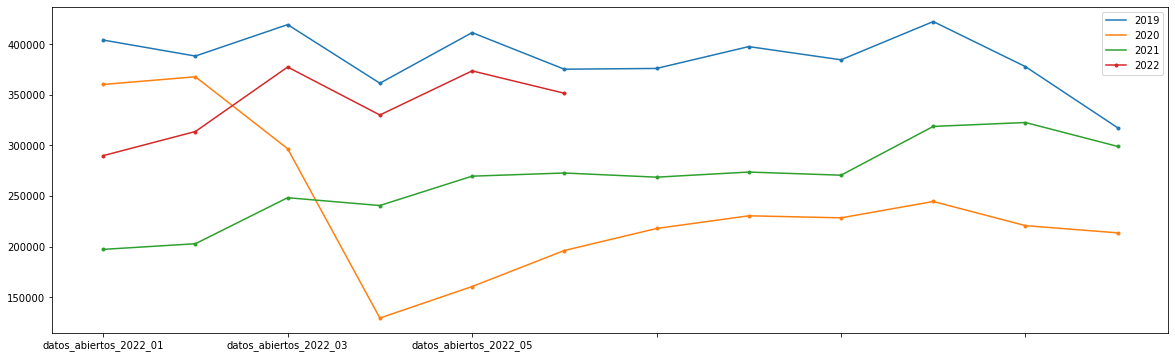

In [6]:
fig, ax = plt.subplots(figsize=(20, 6))

output[49:61].plot(label="2019", legend=True, marker='.')   # BLUE LINE
output[61:73].plot(label="2020", legend=True, marker='.')   # BLUE LINE
output[73:85].plot(label="2021", legend=True, marker='.')   # BLUE LINE
output[85:91].plot(label="2022", legend=True, marker='.')   # BLUE LINE

## COVID & Weather

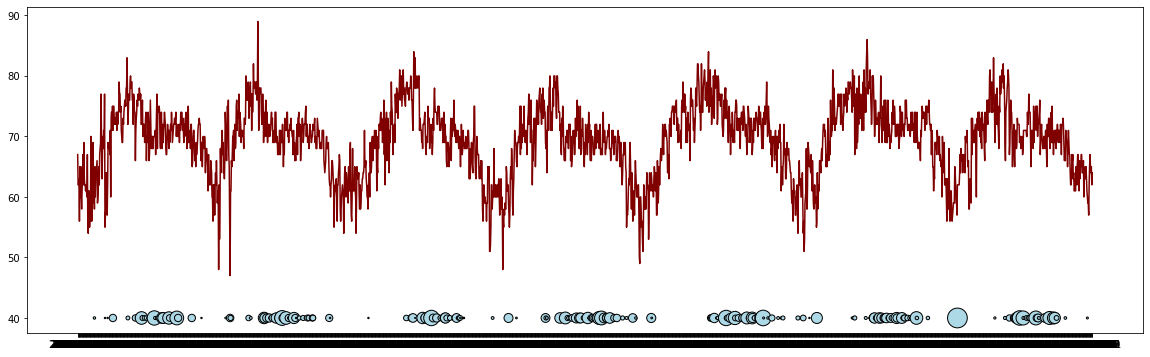

In [3]:
fig, ax = plt.subplots(figsize=(20, 6))

y = [40]*len(weather_df.PRCP) 
plt.plot(weather_df.Date, weather_df.TAVG, color='maroon', label='Temperature (F)')   # RED LINE
plt.scatter(weather_df.Date, y, s = weather_df.PRCP*100, color='lightblue', edgecolor='black', label='Rainfall (in)')  # BLUE DOT


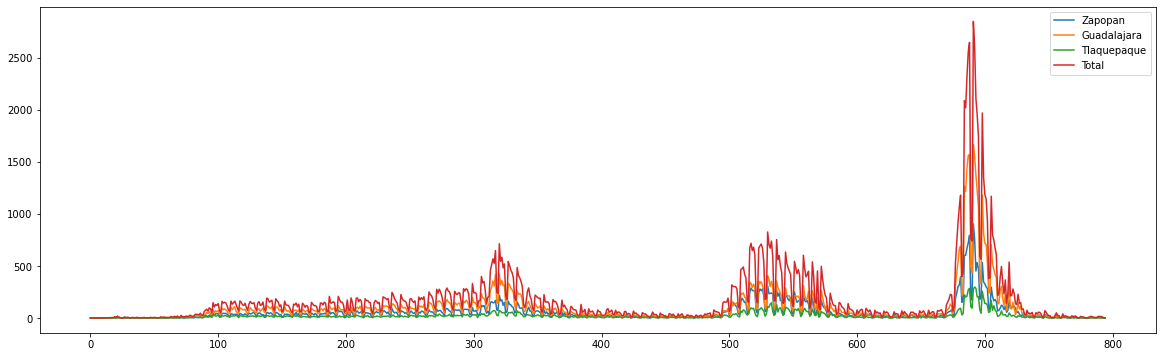

In [4]:
fig, ax = plt.subplots(figsize=(20, 6))

covid_df.Zapopan.plot(label="Zapopan", legend=True)
covid_df.Guadalajara.plot(label="Guadalajara", legend=True)
covid_df.Tlaquepaque.plot(label="Tlaquepaque", legend=True)
covid_df.Total.plot(label="Total", legend=True)

plt.show()

## Average Trip Duration

## MiBici Hourly Usage

Hourly usage across all years

In [35]:
# Loop through each file, temporarily save as dataframe, and obtain the number of bikes per hour
hourly = pd.Series(name="Rows", dtype=int)
for file in files:
    df = pd.read_csv(os.path.join(path, file), encoding='latin-1')
    hourly = pd.concat([hourly, df['Start_Hour'].value_counts(sort=False)], axis=1).sum(axis=1)

<AxesSubplot:>

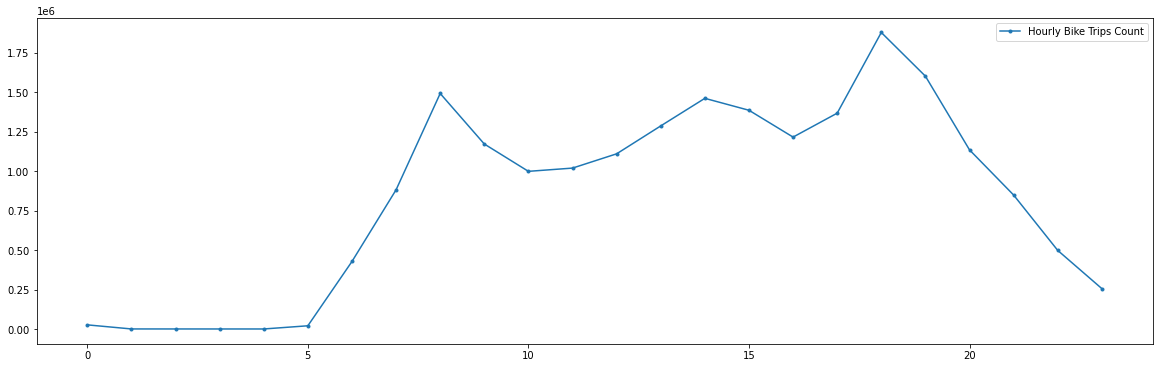

In [36]:
fig, ax = plt.subplots(figsize=(20, 6))
hourly.plot(label="Hourly Bike Trips Count", legend=True, marker='.')   # BLUE LINE

Hourly usage during the weekday vs the weekend

In [87]:
# Loop through each file, temporarily save as dataframe, and obtain the number of bikes per hour
hourly_byday = pd.Series(name="Rows", dtype=int)
for file in files:
    df = pd.read_csv(os.path.join(path, file), encoding='latin-1')
    hourly_byday = pd.concat([hourly_byday, df.groupby(['Start_Weekday', 'Start_Hour']).size()], axis=1).sum(axis=1)

<AxesSubplot:>

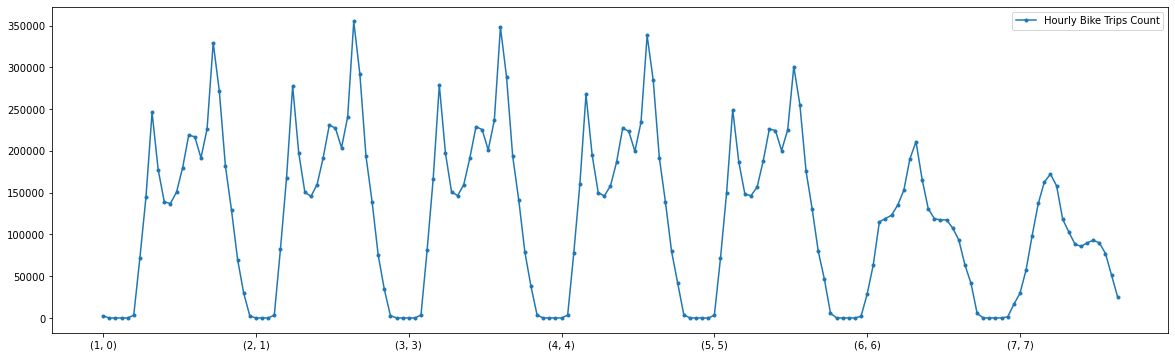

In [88]:
fig, ax = plt.subplots(figsize=(20, 6))
hourly_byday.plot(label="Hourly Bike Trips Count by Day of the Week", legend=True, marker='.')   # BLUE LINE

**Circular heatmap:** for efficiency purposes, cycling behaviors between March 2020 - May 2020 (the only lockdown in Mexico) will be compared to the same months in other years to see how they potentially differ.

In [ ]:
# for each file in my folder, find the files that are for march (03), april (04), and may (05)
matchers = ['03','04', '05']
matching = [s for s in files if any(xs in s for xs in matchers)]

In [ ]:
# Loop through each file, temporarily save as dataframe, and obtain the number of bikes per hour
hourly_byday = pd.Series(name="Rows", dtype=int)
for file in files:
    df = pd.read_csv(os.path.join(path, file), encoding='latin-1')
    hourly_byday = pd.concat([hourly_byday, df.groupby(['Start_Weekday', 'Start_Hour']).size()], axis=1).sum(axis=1)

In [42]:
matching

['datos_abiertos_2015_03.csv',
 'datos_abiertos_2015_04.csv',
 'datos_abiertos_2015_05.csv',
 'datos_abiertos_2016_03.csv',
 'datos_abiertos_2016_04.csv',
 'datos_abiertos_2016_05.csv',
 'datos_abiertos_2017_03.csv',
 'datos_abiertos_2017_04-1.csv',
 'datos_abiertos_2017_05.csv',
 'datos_abiertos_2018_03.csv',
 'datos_abiertos_2018_04.csv',
 'datos_abiertos_2018_05.csv',
 'datos_abiertos_2019_03.csv',
 'datos_abiertos_2019_04.csv',
 'datos_abiertos_2019_05.csv',
 'datos_abiertos_2020_03.csv',
 'datos_abiertos_2020_04.csv',
 'datos_abiertos_2020_05.csv',
 'datos_abiertos_2021_03.csv',
 'datos_abiertos_2021_04.csv',
 'datos_abiertos_2021_05.csv',
 'datos_abiertos_2022_03.csv',
 'datos_abiertos_2022_04.csv',
 'datos_abiertos_2022_05.csv']

In [ ]:
# Convert Start_Time to type datetime 
df["Start_Time"] = pd.to_datetime(df.Start_Time)

In [29]:
df_hrmap = pd.DataFrame()

In [30]:
# create relevant time columns
df_hrmap["Day & Hour"] = df["Start_Time"].dt.strftime("%A %H:00")
df_hrmap["Week of Year"] = df["Start_Time"].dt.strftime("Week %W")
df_hrmap["Date"] = df["Start_Time"].dt.strftime("%Y-%m-%d")
df_hrmap["Date_Hr_Count"] = df["Start_Time"].dt.strftime("%Y-%m-%d %H:00")
df_hrmap["Hr"] = df["Start_Time"].dt.strftime("%H:00")

In [37]:
df_hrmap.groupby(['Date_Hr_Count','Hr']).size()

Date_Hr_Count     Hr   
2021-04-01 00:00  00:00     40
2021-04-01 05:00  05:00     15
2021-04-01 06:00  06:00    113
2021-04-01 07:00  07:00    236
2021-04-01 08:00  08:00    329
                          ... 
2021-04-30 19:00  19:00    730
2021-04-30 20:00  20:00    604
2021-04-30 21:00  21:00    503
2021-04-30 22:00  22:00    291
2021-04-30 23:00  23:00    146
Length: 600, dtype: int64

<AxesSubplot:xlabel='Date_Hr_Count,Hr'>

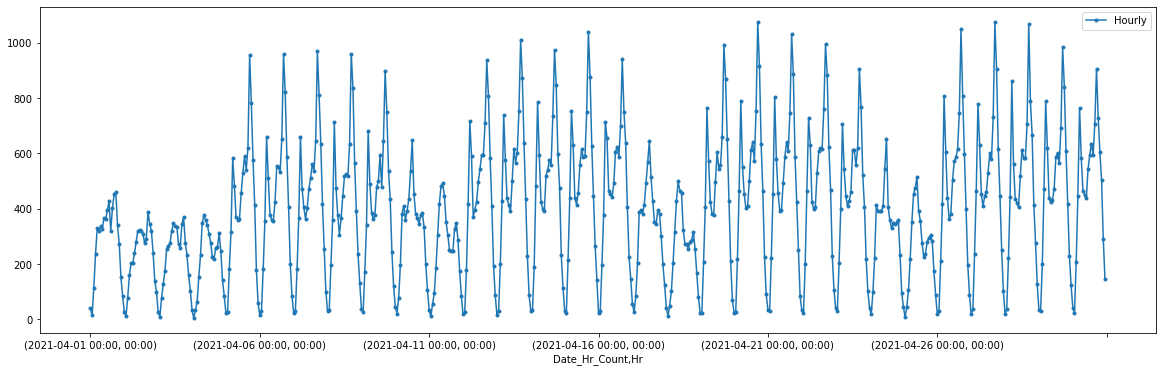

In [38]:
fig, ax = plt.subplots(figsize=(20, 6))
df_hrmap.groupby(['Date_Hr_Count','Hr']).size().plot(label="Hourly", legend=True, marker='.')   # BLUE LINE

In [ ]:

# for each of these files, count the number of trips within an hour (Start_hour) for each day (Start_Time)
#  some combo of df.groupby('x').size().to_dict() YOU CAN GROUP BY MORE THAN ONE VARIABLE


In [ ]:
# Loop through each file, temporarily save as dataframe, and obtain the number of bikes per hour
hourly_byday = pd.Series(name="Rows", dtype=int)
for file in files:
    if 
    df = pd.read_csv(os.path.join(path, file), encoding='latin-1')
    hourly_byday = pd.concat([hourly_byday, df.groupby(['Start_Weekday', 'Start_Hour']).size()], axis=1).sum(axis=1)

In [6]:
files

['datos_abiertos_2014_12.csv',
 'datos_abiertos_2015_01.csv',
 'datos_abiertos_2015_02.csv',
 'datos_abiertos_2015_03.csv',
 'datos_abiertos_2015_04.csv',
 'datos_abiertos_2015_05.csv',
 'datos_abiertos_2015_06.csv',
 'datos_abiertos_2015_07.csv',
 'datos_abiertos_2015_08.csv',
 'datos_abiertos_2015_09.csv',
 'datos_abiertos_2015_10.csv',
 'datos_abiertos_2015_11.csv',
 'datos_abiertos_2015_12.csv',
 'datos_abiertos_2016_01-1.csv',
 'datos_abiertos_2016_02.csv',
 'datos_abiertos_2016_03.csv',
 'datos_abiertos_2016_04.csv',
 'datos_abiertos_2016_05.csv',
 'datos_abiertos_2016_06.csv',
 'datos_abiertos_2016_07.csv',
 'datos_abiertos_2016_08.csv',
 'datos_abiertos_2016_09.csv',
 'datos_abiertos_2016_10.csv',
 'datos_abiertos_2016_11.csv',
 'datos_abiertos_2016_12.csv',
 'datos_abiertos_2017_01.csv',
 'datos_abiertos_2017_02.csv',
 'datos_abiertos_2017_03.csv',
 'datos_abiertos_2017_04-1.csv',
 'datos_abiertos_2017_05.csv',
 'datos_abiertos_2017_06.csv',
 'datos_abiertos_2017_07.csv',
 'da

In [10]:
matching = [s for s in files if "03" in s]

In [12]:
matching.append([s for s in files if "04" in s])
matching.append([s for s in files if "05" in s])

In [14]:
matchers = ['03','04', '05']
matching = [s for s in files if any(xs in s for xs in matchers)]

In [15]:
matching

['datos_abiertos_2015_03.csv',
 'datos_abiertos_2015_04.csv',
 'datos_abiertos_2015_05.csv',
 'datos_abiertos_2016_03.csv',
 'datos_abiertos_2016_04.csv',
 'datos_abiertos_2016_05.csv',
 'datos_abiertos_2017_03.csv',
 'datos_abiertos_2017_04-1.csv',
 'datos_abiertos_2017_05.csv',
 'datos_abiertos_2018_03.csv',
 'datos_abiertos_2018_04.csv',
 'datos_abiertos_2018_05.csv',
 'datos_abiertos_2019_03.csv',
 'datos_abiertos_2019_04.csv',
 'datos_abiertos_2019_05.csv',
 'datos_abiertos_2020_03.csv',
 'datos_abiertos_2020_04.csv',
 'datos_abiertos_2020_05.csv',
 'datos_abiertos_2021_03.csv',
 'datos_abiertos_2021_04.csv',
 'datos_abiertos_2021_05.csv',
 'datos_abiertos_2022_03.csv',
 'datos_abiertos_2022_04.csv',
 'datos_abiertos_2022_05.csv']

## Station Popularity